In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data import RANZCRDataset
import joblib

In [2]:
train = pd.read_csv('../../input/kaggle/train.csv')
train_annotations = pd.read_csv('../../input/kaggle/train_annotations.csv', index_col='StudyInstanceUID')
sample_submission = pd.read_csv('../../input/kaggle/sample_submission.csv')
uids = train['StudyInstanceUID'].values
folds = joblib.load('folds.jl')
label_cols = [
    'ETT - Abnormal', 'ETT - Borderline', 'ETT - Normal', 'NGT - Abnormal', 'NGT - Borderline',
    'NGT - Incompletely Imaged', 'NGT - Normal', 'CVC - Abnormal', 'CVC - Borderline', 'CVC - Normal',
    'Swan Ganz Catheter Present'
]
img_path = '../../input/kaggle/train'
train_annotations['data'] = train_annotations['data'].apply(eval)

25881


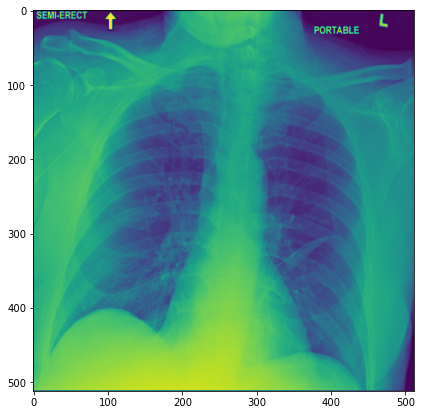

12715


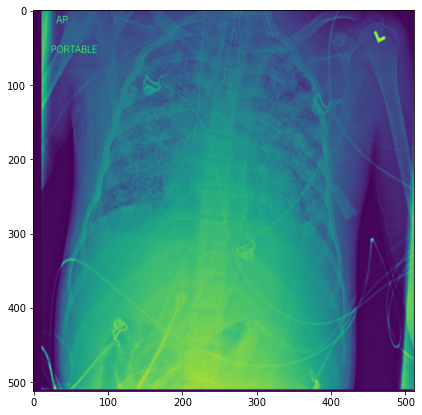

22004


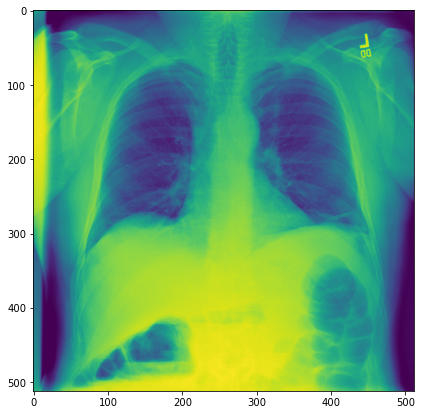

719


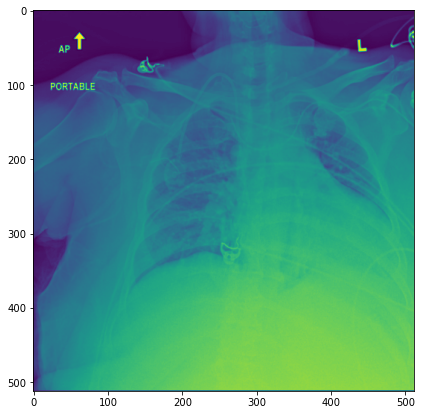

16633


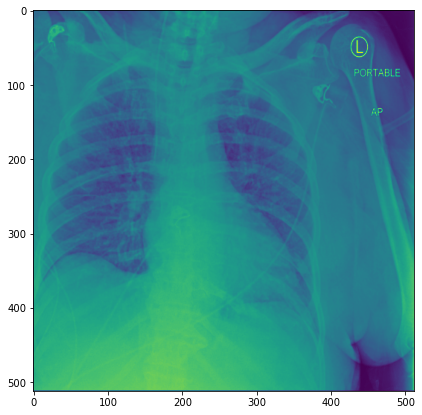

8010


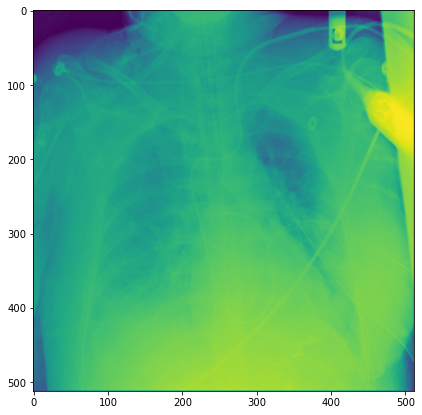

21858


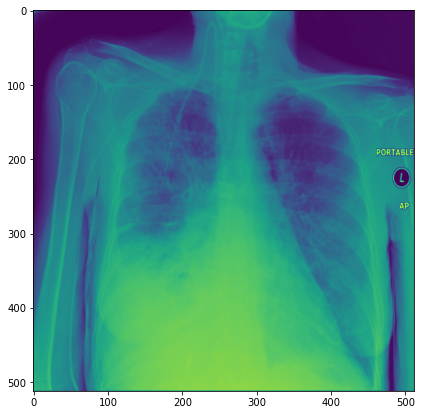

2200


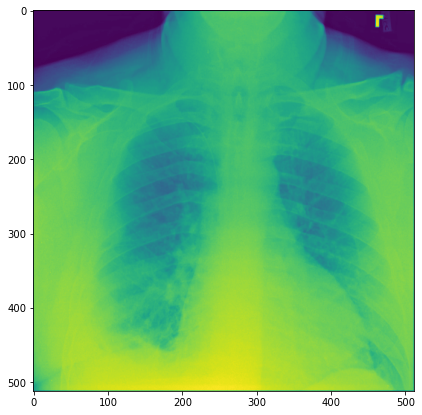

7781


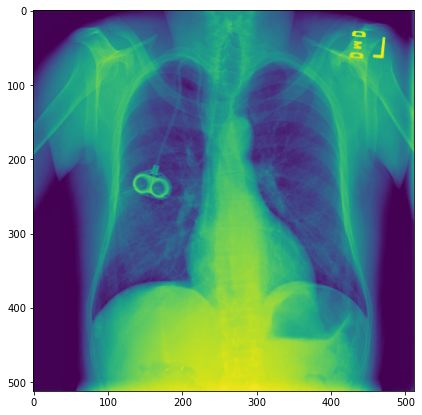

16450


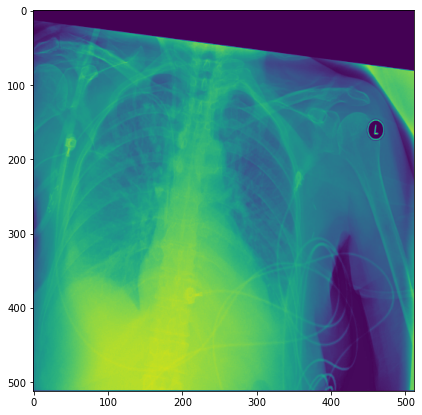

9106


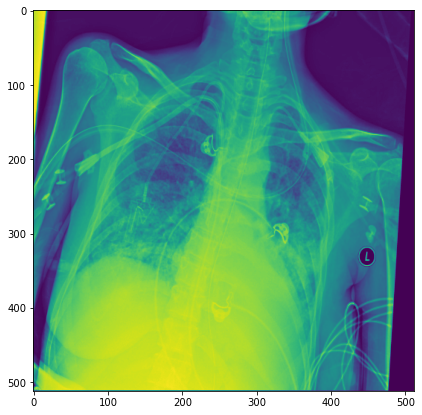

8489


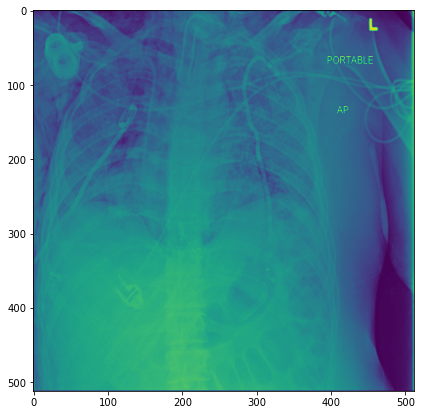

17742


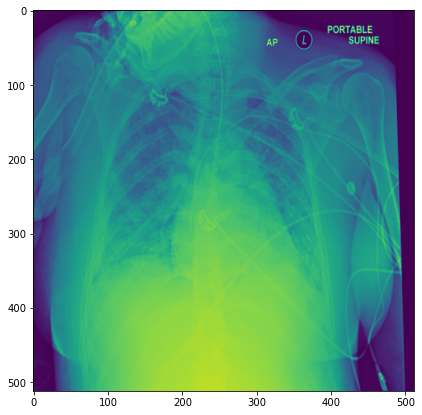

28363


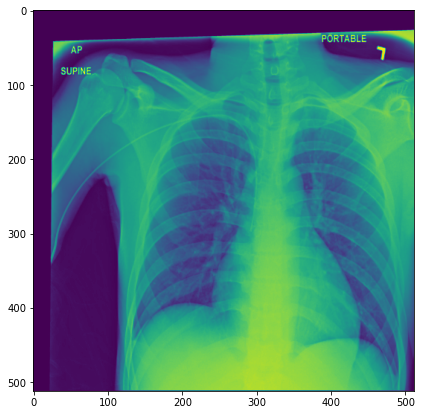

21869


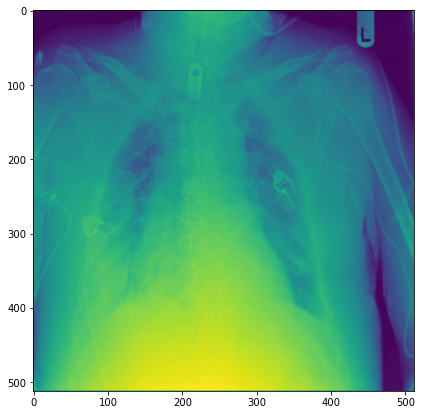

26195


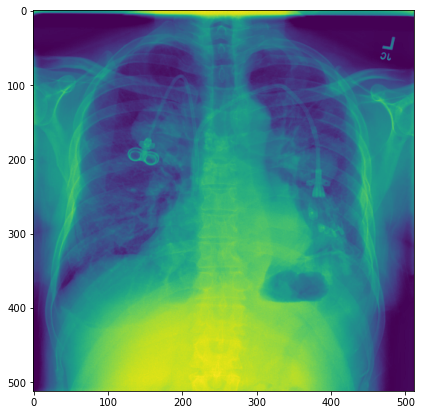

12484


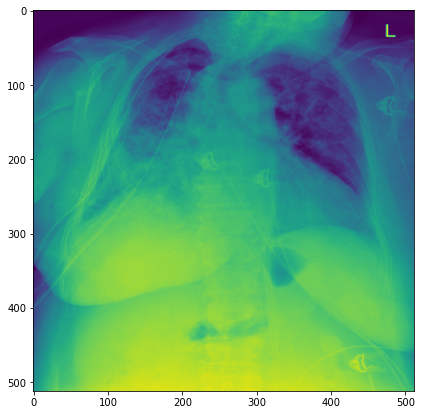

4366


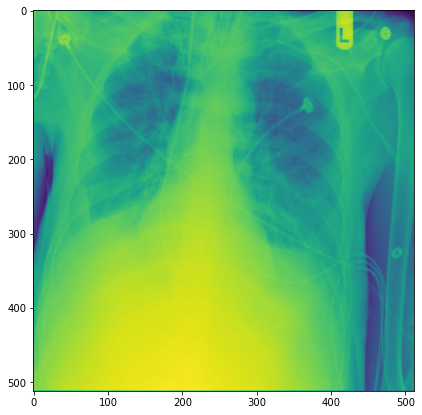

23864


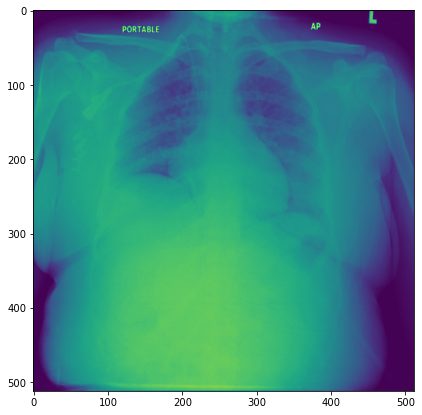

29744


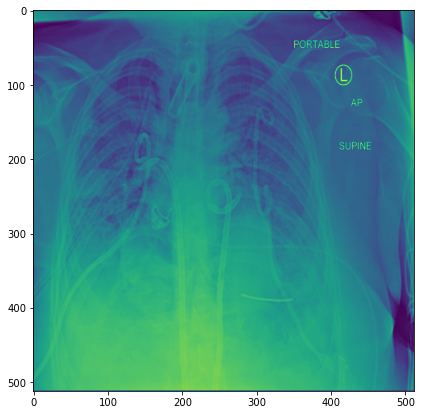

In [4]:
class cfg:
    data_dir = img_path
    resolution = 512
mode = 'test'
dataset = RANZCRDataset(train['StudyInstanceUID'].values, cfg, mode)
for i in np.random.randint(0, len(dataset), 20):
    print(i)
    cur = dataset[i]
    plt.figure(figsize=(7, 7))
    plt.imshow(cur['img'][0])
    plt.show()
    if mode != 'test':
        if cur['annotated']==1:
            mask_exist_index = np.where(cur['masks'].numpy().sum(axis=(1,2)) > 0)[0]
            for idx in mask_exist_index:
                plt.figure(figsize=(7, 7))
                plt.imshow(cur['masks'][idx])
                plt.show()
